
# Wake County,NC Housing 

## Introduction
Wake county is one of the most livable counties in North Carolina. Raleigh which is one of the cities in the county was ranked 2nd(https://realestate.usnews.com/places/rankings/best-places-to-live) as best place to live in the U.S in 2021-2022 with its suburbs ranked among the best cities in the United states.Wake county has high attraction of individuals moving in across the world with the dream of making this great county their home, Wake county is also great place for families with children to consider to live in.

- Because of the many great things about wake county, I decided to do a comprehensive analysis of the wake county’s housing market. 


### Data Description and Data Processing
The dataset contains data from residential (single family) homes in wake county,NC from 1800s to July 2021. The original data was accessed on 07/20/2021 from wake county website(http://www.wakegov.com/tax/realestate/redatafile/Pages/default.aspx). The data contained all the properties in wake county commercial and residential with 420,971 rows and 87 variables ranging from owner's personal information to housing information.


### Hypothseis
- What is the average price of the house in the different cities of the wake county?
- What are top Cities homes by price?
- In which months are more homes sold in wake county?
- What is the average age of homes?
- What are the average types of homes in wake county?

### Exploratory Analysis
Used excel filter tool to narrow down to only single-family homes and variables that are directly relates with the property sales. Loaded the data pre-processed data to Python to explore the columns and checking for missing values.
- For the Year_Remodeled if no remodeled done then Year_Built was used.


In [1]:
#Importing Libraries and setting the path to data
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
path = 'C:/Users/nanci/OneDrive/Kaggle/'

In [3]:
wake_houses =  pd.read_csv(path + 'WakeCountyHousing.csv')
wake_houses.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,"27,610.00"
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,"27,610.00"
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,"27,591.00"
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,"27,613.00"
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,"27,607.00"


In [4]:
#Looking at the number of rows and columns
wake_houses.shape

(308292, 15)

In [5]:
#looking at the dtypes
wake_houses.dtypes

Real_Estate_Id          int64
Deeded_Acreage        float64
Total_Sale_Price        int64
Total_Sale_Date        object
Month_Year_of_Sale     object
Year_of_Sale            int64
Year_Built              int64
Year_Remodeled          int64
Heated_Area             int64
Num_Stories            object
Design_Style           object
Bath                   object
Utilities              object
Physical_City          object
Physical_Zip          float64
dtype: object

In [6]:
# fix the Real_Estate and Physical_zip to be non numeric
wake_houses.Real_Estate_Id = wake_houses.Real_Estate_Id.astype(str)
wake_houses.Physical_Zip = wake_houses.Physical_Zip.astype(str)

In [7]:
#Checking to make sure the Real_Estate and Physical_zip are non numeric
wake_houses.dtypes

Real_Estate_Id         object
Deeded_Acreage        float64
Total_Sale_Price        int64
Total_Sale_Date        object
Month_Year_of_Sale     object
Year_of_Sale            int64
Year_Built              int64
Year_Remodeled          int64
Heated_Area             int64
Num_Stories            object
Design_Style           object
Bath                   object
Utilities              object
Physical_City          object
Physical_Zip           object
dtype: object

In [8]:
#Checking for null values
wake_houses.isnull().sum()

Real_Estate_Id           0
Deeded_Acreage           0
Total_Sale_Price         0
Total_Sale_Date          0
Month_Year_of_Sale       0
Year_of_Sale             0
Year_Built               0
Year_Remodeled           0
Heated_Area              0
Num_Stories              0
Design_Style             0
Bath                    17
Utilities             1968
Physical_City          109
Physical_Zip             0
dtype: int64

In [9]:
#Fill nulls with Other for Bath and ALL for Utilities
wake_houses.Bath.fillna('Other',inplace=True)
wake_houses.Utilities.fillna('ALL', inplace=True)
wake_houses.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [10]:
wake_houses.isnull().sum()

Real_Estate_Id          0
Deeded_Acreage          0
Total_Sale_Price        0
Total_Sale_Date         0
Month_Year_of_Sale      0
Year_of_Sale            0
Year_Built              0
Year_Remodeled          0
Heated_Area             0
Num_Stories             0
Design_Style            0
Bath                    0
Utilities               0
Physical_City         109
Physical_Zip            0
dtype: int64

In [11]:
wake_houses = wake_houses.dropna()
wake_houses.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [12]:
#checking to make sure we have no nulls 
wake_houses.isnull().sum()

Real_Estate_Id        0
Deeded_Acreage        0
Total_Sale_Price      0
Total_Sale_Date       0
Month_Year_of_Sale    0
Year_of_Sale          0
Year_Built            0
Year_Remodeled        0
Heated_Area           0
Num_Stories           0
Design_Style          0
Bath                  0
Utilities             0
Physical_City         0
Physical_Zip          0
dtype: int64

## Creating New Varibles

In [13]:
# creating a function to group the homes by year built/remodeled
def func(x):
    if x <= 1939:
        return '1939 or older'
    elif x <= 1969:
        return '1940-1969'
    elif x <= 1999:
        return '1970-1999'
    else:
        return '2000 or Newer'

In [14]:
wake_houses['Age_Of_Home']=wake_houses['Year_Remodeled'].apply(func)
wake_houses.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,Age_Of_Home
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0,1940-1969
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0,1970-1999
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0,1939 or older
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0,1970-1999
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0,2000 or Newer


In [15]:
wake_houses.Design_Style.replace(['Split Foyer','Condo',     
       'Contemporary', 'Modular', 'Colonial', 'Conversion',
       'Log', 'Other', 'Cape', 'Duplex', 'Manuf Multi'],'other', inplace=True)
wake_houses.head(10)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,Age_Of_Home
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0,1940-1969
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0,1970-1999
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0,1939 or older
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0,1970-1999
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0,2000 or Newer
5,31,0.39,337500,7/17/2002,July 2002,2002,1970,1970,2463,One Story,Conventional,2 Bath,ALL,Raleigh,27615.0,1970-1999
6,33,0.50,32500,2/6/1979,February 1979,1979,1969,1969,2389,One Story,Ranch,3 Bath,WGE,Raleigh,27607.0,1940-1969
7,34,0.70,19500,1/1/1968,January 1968,1968,1968,1968,1280,One Story,Conventional,2 Bath,ALL,Raleigh,27606.0,1940-1969
8,35,0.49,319000,1/16/1996,January 1996,1996,1938,1938,4650,Two Story,Conventional,3½ Bath,ALL,Raleigh,27608.0,1939 or older
9,37,0.13,425000,4/15/2008,April 2008,2008,1921,1921,1890,Other,Conventional,2 Bath,ALL,Raleigh,27604.0,1939 or older


In [16]:
#Evaluating Numeric Distributions
wake_houses.describe()

,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area
count,"308,183.00","308,183.00","308,183.00","308,183.00","308,183.00","308,183.00"
mean,0.44,"273,801.69","2,009.58","1,994.98","1,995.80","2,267.30"
std,1.85,"190,372.84",10.52,19.67,19.32,997.53
min,0.00,0.00,"1,956.00",0.00,0.00,220.00
25%,0.14,"150,000.00","2,004.00","1,986.00","1,986.00","1,532.00"
50%,0.24,"235,000.00","2,013.00","1,999.00","2,000.00","2,087.00"
75%,0.42,"350,000.00","2,018.00","2,007.00","2,008.00","2,794.00"
max,307.91,"6,100,200.00","2,021.00","2,022.00","2,209.00","21,993.00"


In [17]:
wake_houses.describe(percentiles=[0.01,0.05,0.1,0.25,0.75,0.9,0.95,0.99])

,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area
count,"308,183.00","308,183.00","308,183.00","308,183.00","308,183.00","308,183.00"
mean,0.44,"273,801.69","2,009.58","1,994.98","1,995.80","2,267.30"
std,1.85,"190,372.84",10.52,19.67,19.32,997.53
min,0.00,0.00,"1,956.00",0.00,0.00,220.00
1%,0.00,"13,000.00","1,975.00","1,927.00","1,930.00",820.00
5%,0.03,"62,000.00","1,988.00","1,958.00","1,959.00","1,079.00"
10%,0.04,"95,000.00","1,995.00","1,969.00","1,971.00","1,216.00"
25%,0.14,"150,000.00","2,004.00","1,986.00","1,986.00","1,532.00"
50%,0.24,"235,000.00","2,013.00","1,999.00","2,000.00","2,087.00"
75%,0.42,"350,000.00","2,018.00","2,007.00","2,008.00","2,794.00"


Fromethe above ,we can see there are issues that needs to be addressed;

1. Deeded_Acreage 0.00 and 307.91 
2. Year_remodeled 0.00 and 2209
3. Total_sale_price  0  (No house can be sold for 0$)
4. Heated_Area 0, no homes have 0 square feet
5. Year Built 2022

*Will fix these outliers by filtering them out.

In [18]:
# Remove bottom 5% and Top 99% of Deeded acreage 2.06
filter1 = (wake_houses.Deeded_Acreage > 0.03) & (wake_houses.Deeded_Acreage <2.06)

# remove top bottom 99% of Year_Remodeled
filter2 = (wake_houses.Year_Remodeled > 1930) & (wake_houses.Year_Remodeled < 2021)

# Remove bottom 1% ($13,000) 
filter3 =(wake_houses.Total_Sale_Price > 13000) & (wake_houses.Total_Sale_Price < 900000)

# Houses between 820 and 5451 square feet
filter4 =  (wake_houses.Heated_Area > 820)  & (wake_houses.Heated_Area < 5451) 

# Romove Year Built 2022
filter5 = wake_houses.Year_Built < 2021


In [19]:
##use filters to create a new dataframe
wake_houses2 = wake_houses[filter1 & filter2 & filter3 & filter4 & filter5].copy() 

In [20]:
# Checking to make sure the outliers have been removed
wake_houses2.describe(percentiles=[0.01,0.05,0.1,0.25,0.75,0.9,0.95,0.99])

,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area
count,"265,250.00","265,250.00","265,250.00","265,250.00","265,250.00","265,250.00"
mean,0.35,"273,448.93","2,009.66","1,996.31","1,997.17","2,302.11"
std,0.32,"152,961.22",10.28,17.27,16.79,860.16
min,0.04,"13,200.00","1,961.00","1,800.00","1,931.00",821.00
1%,0.04,"29,000.00","1,976.00","1,947.00","1,949.00",975.00
5%,0.05,"78,000.00","1,989.00","1,961.00","1,962.00","1,152.00"
10%,0.08,"108,000.00","1,995.00","1,971.00","1,972.00","1,292.00"
25%,0.16,"160,500.00","2,004.00","1,987.00","1,988.00","1,633.00"
50%,0.25,"246,000.00","2,013.00","2,000.00","2,000.00","2,182.00"
75%,0.41,"355,000.00","2,018.00","2,008.00","2,009.00","2,832.00"


In [21]:
wake_houses2.shape

(265250, 16)

## Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0DB2B2488>,
      dtype=object)

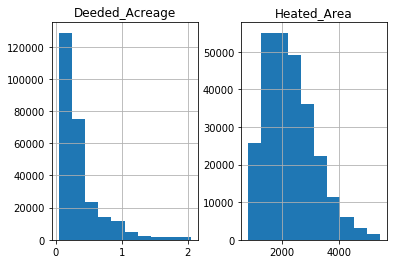

In [22]:
wake_houses2.hist(column= ['Heated_Area','Deeded_Acreage'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0DF18B588>,
      dtype=object)

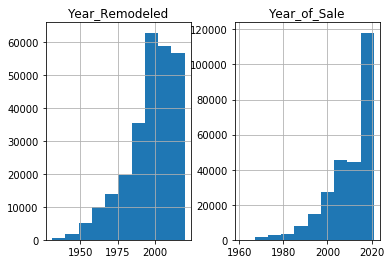

In [23]:
wake_houses2.hist(column= ['Year_of_Sale','Year_Remodeled'])

### Histogram Interpretation 

- Most homes are build in land between 0.2 and 0.5 acres
- Most Wake county homes are between 1500 and 2500 square feet
- Most homes in wake county were build in the 2000's and above
- As year goes by the number of homes increases

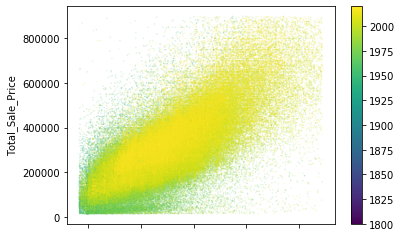

In [24]:
#Check the relationship between Heated_Area and Total_Sale_Price
wake_houses2.plot.scatter(x='Heated_Area', y='Total_Sale_Price', s=0.01, c = wake_houses2.Year_Built,cmap='viridis')

- There's is a positive ralationship between the total sale price and the heated area.


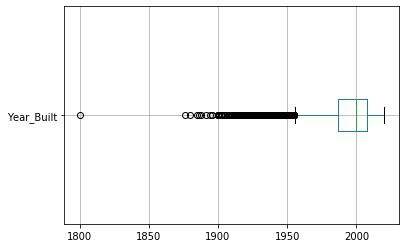

In [25]:
#check Year_Built distribution by boxplots
wake_houses2.boxplot(column= ['Year_Built'], vert = False)

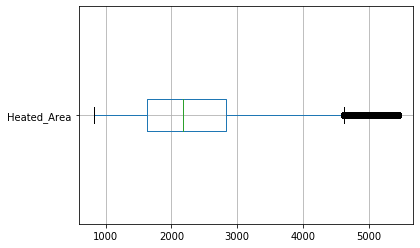

In [26]:
#check heated_Area distribution by boxplots
wake_houses2.boxplot(column= ['Heated_Area'], vert = False)

### Interpretation
- Houses Built before 1960 are outliers
- Houses with above 4500 square foot are considered outliers. This means houses with this square foot are uncommon in wake county


In [27]:
wake_houses3 = wake_houses2.groupby(['Year_Built']).size().reset_index(name='House_Count')
wake_houses3.head()

,Year_Built,House_Count
0,1800,1
1,1876,1
2,1880,1
3,1885,1
4,1886,1


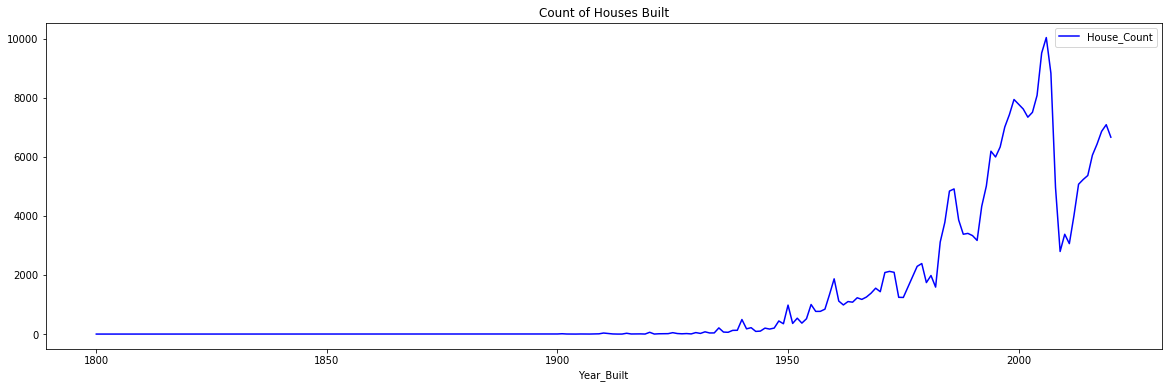

In [28]:
#Time series of house count and year built
wake_houses3.plot(x='Year_Built',y='House_Count',figsize=(20,6),linestyle='-',color='b',title='Count of Houses Built')

In [29]:
wake_houses4 = wake_houses2.groupby(['Year_of_Sale']).size().reset_index(name='House_Count')
wake_houses4.head()

,Year_of_Sale,House_Count
0,1961,1
1,1962,1
2,1963,1
3,1965,1
4,1966,1


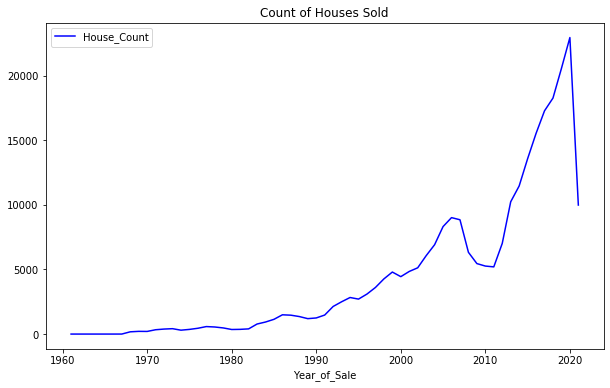

In [30]:
#Time series of house count and year Sold
wake_houses4.plot(x='Year_of_Sale',y='House_Count',figsize=(10,6),linestyle='-',color='b', title='Count of Houses Sold')

In [31]:
wake_houses5 = wake_houses2.groupby(['Physical_City'])["Total_Sale_Price"].mean().reset_index(name='House_Average_Price_by_City')
wake_houses5.head()

,Physical_City,House_Average_Price_by_City
0,Angier,"253,955.43"
1,Apex,"337,906.75"
2,Cary,"323,836.12"
3,Clayton,"154,160.98"
4,Creedmoor,"126,666.67"


In [32]:
wake_houses5 = wake_houses5.sort_values(by='House_Average_Price_by_City', ignore_index=True, ascending = False)

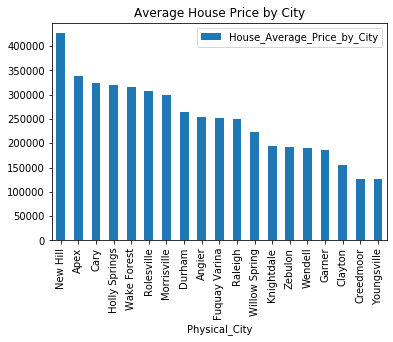

In [33]:
wake_houses5.plot.bar(x='Physical_City', y= 'House_Average_Price_by_City', title = 'Average House Price by City',legend ='upper left' )

In [34]:
wake_houses6 = wake_houses2.groupby(['Design_Style'])["Total_Sale_Price"].mean().reset_index(name='House_Average_Price_by_Design_Style') 
wake_houses6.head()

,Design_Style,House_Average_Price_by_Design_Style
0,Conventional,"287,508.55"
1,Ranch,"150,827.61"
2,Split level,"181,753.48"
3,Townhouse,"233,383.64"
4,other,"198,007.54"


- conventional homes average at $287,509.00  followed by Townhouse at $233,384. The cheapest homes in wake county are the Ranch Style at an average price of $150,828.00

In [35]:
wake_houses6 = wake_houses6.sort_values(by='House_Average_Price_by_Design_Style', ignore_index=True, ascending = False)

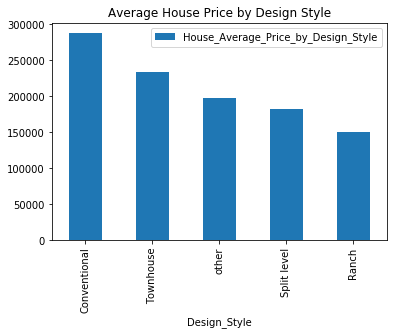

In [36]:
wake_houses6.plot.bar(x = 'Design_Style', y='House_Average_Price_by_Design_Style', title = 'Average House Price by Design Style',legend ='upper left' )

In [37]:
wake_houses7 = wake_houses2.groupby(['Year_of_Sale','Month_Year_of_Sale'])["Total_Sale_Price"].size().reset_index(name='House_Count')
wake_houses7.head()

,Year_of_Sale,Month_Year_of_Sale,House_Count
0,1961,January 1961,1
1,1962,January 1962,1
2,1963,January 1963,1
3,1965,January 1965,1
4,1966,September 1966,1


In [38]:
#wake_houses7['Month_Year_of_Sale']=pd.to_datetime(wake_houses7['Month_Year_of_Sale'])
#wake_houses7.sort_values(by=['Month_Year_of_Sale'], inplace=True, ascending=False)

In [39]:
wake_houses8 = wake_houses7[wake_houses7.Year_of_Sale > 2016].sort_index()
wake_houses8.head()

,Year_of_Sale,Month_Year_of_Sale,House_Count
478,2017,April 2017,1346
479,2017,August 2017,1719
480,2017,December 2017,1474
481,2017,February 2017,911
482,2017,January 2017,814


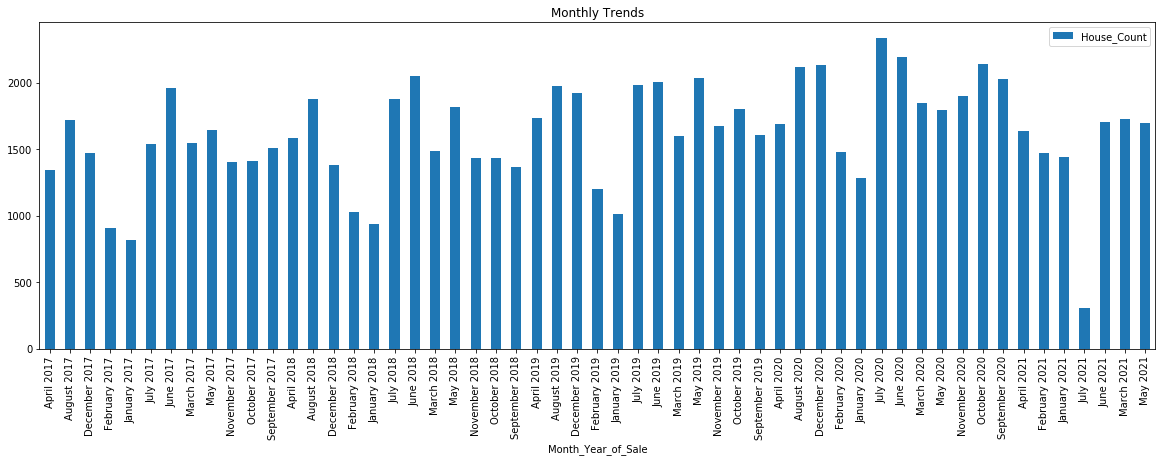

In [40]:
wake_houses8.plot.bar(x = 'Month_Year_of_Sale', y='House_Count', title = 'Monthly Trends',legend ='upper left',figsize=(20,6))